# Chapter 4: Training Models
-----
-----

Look at simplest model, Linear Regression. Two ways to train it:
- "closed-form" equation, noraml Equation.
- iterative optimization approach, Gradient Descent. batch, mini-batch, stochastic

## Linear Regression
-----

General Equation:

$$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + ... + \theta_n x_n$$

- y hat : predicted value
- n is number of features
- x_i is ith feature value
- theta_j is jth model parameter

more concisely:

$$ \hat{y} = h_\theta(x) = \theta^T \cdot x$$

most common preformance measure is RMSE but simpler to use MSE:

#### The Normal Equation
Will give use the solution directly

$$\hat{\theta} = (X^T \cdot X)^{-1} \cdot X^T \cdot y$$


In [1]:
import numpy as np

X = 2 * np.random.rand(100,1)
y = 4 + 3 * X + np.random.randn(100, 1)

X_b = np.c_[np.ones((100,1)), X]
theta_best = np.linalg.inv(X_b.T.dot(X_b)).dot(X_b.T).dot(y)
theta_best

array([[3.81930324],
       [3.01036056]])

In [2]:
X_new = np.array([[0],[2]])
X_new_b = np.c_[np.ones((2,1)), X_new]
y_predict = X_new_b.dot(theta_best)
y_predict

array([[3.81930324],
       [9.84002437]])

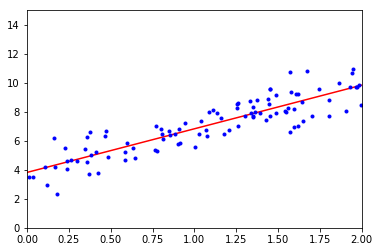

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt

plt.plot(X_new, y_predict, "r-")
plt.plot(X,y, "b.")
plt.axis([0,2,0,15])
plt.show()

In [4]:
# equivalent to

from sklearn.linear_model import LinearRegression
lin_reg = LinearRegression()
lin_reg.fit(X, y)
lin_reg.intercept_, lin_reg.coef_

(array([3.81930324]), array([[3.01036056]]))

In [5]:
lin_reg.predict(X_new)

array([[3.81930324],
       [9.84002437]])

#### Computational Complexity
calculating the inverse of X^T dot X is tipically O(n^2.4) to O(n^3). When the number of features grows the the normal equation preforms very poorly.
on the other hand the number of instance only grow the complexity linearly O(m).

#### Gradient Decent
Idea is to tweak paramters iteratively in order to minimize the cost function. This works by measuring the local gradient of the error function with regards to paramter vector Theta and it goes in the direction of descending gradient. The size of the step is determined by `learning rate` hyperparameter, too small and there will be no convergence, to big and we might over shoot it.

Note not all cost functions are convex, some may have many local minima and a global minimum. MSE is convex though.

#### Batch Gradient Decent
compute the partial derivative in all dimensions, subtract the gradient from original theta and multiple the gradient by `learning rate`(alpha)

$$ \theta^{next step} = \theta - \alpha \bigtriangledown_{\theta} MSE(\theta)$$

In [6]:
alpha  = 0.1 
n_iterations = 1000
m = 100
theta = np.random.randn(2,1)
for iteration in range(n_iterations):
    gradients =  2/m * X_b.T.dot(X_b.dot(theta) - y)
    theta = theta - alpha * gradients
    
theta
    

array([[3.81930324],
       [3.01036056]])

#### Stochastic Gradient Decent
problem with batch is the fact that it uses the whole training set to compute the gradient at every step, which is very slow. 
Stochastic GD picks a random instance in the training at every step and computes the gradient:
will cause to decent to bounce up and down at it converges to the minima. Is good because it helps get out of local minima but will never settle at a the minimum. A solution is to gradually reduce the `learning rate`

In [11]:
n_epochs = 50
t0, t1 =  5, 50

def learning_schedule(t):
    return  t0 / (t + t1)

theta = np.random.randn(2,1)

for epoch in range(n_epochs):
    for i in range(m):
        random_index = np.random.randint(m)
        xi = X_b[random_index:random_index+1]
        yi = y[random_index:random_index+1]
        gradients = 2 * xi.T.dot(xi.dot(theta) - yi)
        alpha = learning_schedule(epoch * m + i)
        theta = theta - alpha * gradients
        
theta

array([[3.80273046],
       [3.0187383 ]])

In [12]:
from sklearn.linear_model import SGDRegressor
sgd_reg = SGDRegressor(max_iter=50, penalty=None, eta0=0.1, random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.intercept_, sgd_reg.coef_

(array([3.83113672]), array([3.02074213]))

#### Mini-Batch Gradient Decent
Computer gradient on a small random set of instances. a comprimize between batch and stochastic 

In [14]:
theta_path_mgd = []

n_iterations = 50
minibatch_size = 20

np.random.seed(42)
theta = np.random.randn(2,1)  # random initialization

t0, t1 = 200, 1000
def learning_schedule(t):
    return t0 / (t + t1)

t = 0
for epoch in range(n_iterations):
    shuffled_indices = np.random.permutation(m)
    X_b_shuffled = X_b[shuffled_indices]
    y_shuffled = y[shuffled_indices]
    for i in range(0, m, minibatch_size):
        t += 1
        xi = X_b_shuffled[i:i+minibatch_size]
        yi = y_shuffled[i:i+minibatch_size]
        gradients = 2/minibatch_size * xi.T.dot(xi.dot(theta) - yi)
        eta = learning_schedule(t)
        theta = theta - eta * gradients
        theta_path_mgd.append(theta)
        
theta

array([[3.85518558],
       [3.05336629]])

## Polynomial Regression


In [26]:
import numpy as np
import numpy.random as rnd

np.random.seed(42)

m = 100
m = 100
X = 6 * np.random.rand(m, 1) - 3
y = 0.5 * X**2 + X + 2 + np.random.randn(m, 1)

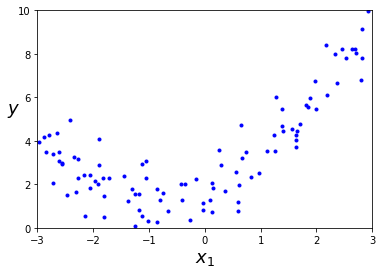

In [27]:
plt.plot(X, y, "b.")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.axis([-3, 3, 0, 10])
plt.show()

In [31]:
# straight line will never fit this data
from sklearn.preprocessing import PolynomialFeatures

poly_features = PolynomialFeatures(degree=2, include_bias=False)

X_poly = poly_features.fit_transform(X)
X[0]

array([-0.75275929])

In [32]:
X_poly[0]

array([-0.75275929,  0.56664654])

In [33]:
lin_reg =  LinearRegression()
lin_reg.fit(X_poly, y)
lin_reg.intercept_, lin_reg.coef_

(array([1.78134581]), array([[0.93366893, 0.56456263]]))

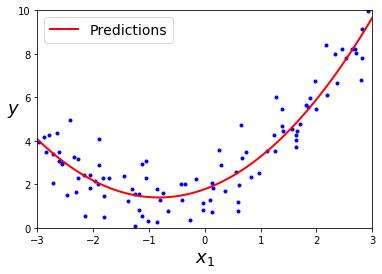

In [34]:
X_new=np.linspace(-3, 3, 100).reshape(100, 1)
X_new_poly = poly_features.transform(X_new)
y_new = lin_reg.predict(X_new_poly)
plt.plot(X, y, "b.")
plt.plot(X_new, y_new, "r-", linewidth=2, label="Predictions")
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", rotation=0, fontsize=18)
plt.legend(loc="upper left", fontsize=14)
plt.axis([-3, 3, 0, 10])
plt.show()

the way this work is that PolynomialFeatures added combinations of the features up to the specified degree, in this case power of two. Say we have feature a and b, we do PolynomialFeatures degree = 3, we then get a^2, b^2, a^3, b^3, ab, a^2b, ab^2

#### Learning Curvers
make sure the degree of polynomial is not to high or it will overfit the training data. or too simle and underfit.

looking at learning curves you can see if your model is underfitting or overfitting.

In [35]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

def plot_learning_curves(model, X, y):
    X_train, X_val, y_train, y_val = train_test_split(X,y, test_size=0.2, random_state=10)
    train_errors, val_errors = [], []
    for m in range(1, len(X_train)):
        model.fit(X_train[:m], y_train[:m])
        y_train_predict = model.predict(X_train[:m])
        y_val_predict = model.predict(X_val)
        train_errors.append(mean_squared_error(y_train[:m], y_train_predict))
        val_errors.append(mean_squared_error(y_val, y_val_predict))
        
    plt.plot(np.sqrt(train_errors), "r-+", linewidth=2, label="train")
    plt.plot(np.sqrt(val_errors), "b-", linewidth=3, label="val")
    plt.legend(loc="upper right", fontsize=14)   # not shown in the book
    plt.xlabel("Training set size", fontsize=14) # not shown
    plt.ylabel("RMSE", fontsize=14) 

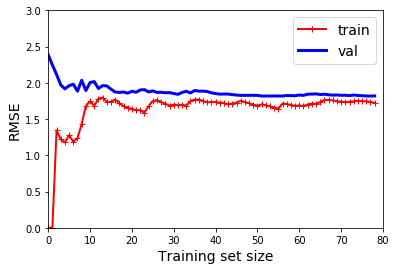

In [36]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X, y)
plt.axis([0, 80, 0, 3])
plt.show() 
# UNDERFITTING

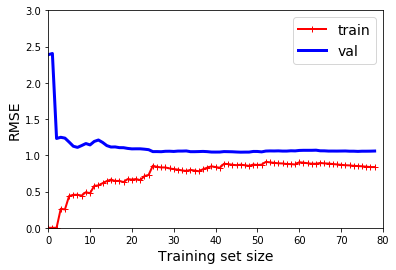

In [37]:
lin_reg = LinearRegression()
plot_learning_curves(lin_reg, X_poly, y)
plt.axis([0, 80, 0, 3])
plt.show() 
# GOOD

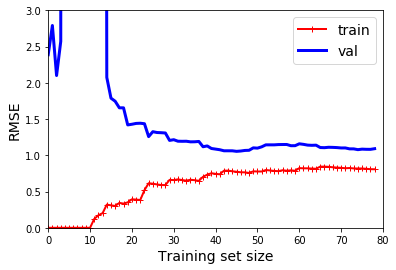

In [38]:
from sklearn.pipeline import Pipeline

polynomial_regression = Pipeline([
        ("poly_features", PolynomialFeatures(degree=10, include_bias=False)),
        ("lin_reg", LinearRegression()),
    ])

plot_learning_curves(polynomial_regression, X, y)
plt.axis([0, 80, 0, 3])           # not shown
plt.show()  
# OVERFITTING

Hi bias/variance tradeoff:
Models generalization error can be expressed as the sum of three different errors

Bias:
> Error due to wrong assumptions, such as assuming data is linear when its actually quadratic. High Bias model is likely to be underfitting training data

Variance:
> Errir due to excessive sensitivity to small variations. Model with many degrees of freedom, is likely to have high variance and thus overfitting training data

Irreducible Error:
> Error due to the noise in the data. Only way reduce the error is to clean the data

## Regularized Linear Models
-----

we will look at ridge regression, lasso regression and elastic net

#### Ridge Regressoion

regularization term is equal to 
$$ \alpha \sum_{i=1}^n \theta_i^2 $$
This will be added to the cost function. This froces the learning algo to not only fit the data but also keep the model weights as small as possible.

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n \theta_i^2$$

Also it the l2 norm 

In [41]:
np.random.seed(42)
m = 20
X = 3 * np.random.rand(m, 1)
y = 1 + 0.5 * X + np.random.randn(m, 1) / 1.5
X_new = np.linspace(0, 3, 100).reshape(100, 1)

from sklearn.linear_model import Ridge
ridge_reg = Ridge(alpha=1, solver="cholesky", random_state=42)
ridge_reg.fit(X, y)
ridge_reg.predict([[1.5]])

array([[1.55071465]])

In [42]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l2", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13500145])

#### Lasso Regressoion

`least absolute shrinkage and selection operator regression`, similar to Ridge but uses l1 norm

$$J(\theta) = MSE(\theta) + \alpha \sum_{i=1}^n |\theta_i|$$

tends to completely eliminate the weights of the least important features. Automatically preforms feature selection and returns a sparse model

In [43]:
sgd_reg = SGDRegressor(max_iter=5, penalty="l1", random_state=42)
sgd_reg.fit(X, y.ravel())
sgd_reg.predict([[1.5]])

array([1.13498188])

In [45]:
from sklearn.linear_model import Lasso
lasso_reg = Lasso(alpha=0.1)
lasso_reg.fit(X, y)
lasso_reg.predict([[1.5]])


array([1.53788174])

#### Elastic Net

middle ground between Ridge and Lasso. Regression term is a mix between the two, you can control the mix ratio r, when r = 0 we get l2 and r = 1 we get ls

$$J(\theta) = MSE(\theta) + \frac{1-r}{2} \alpha \sum_{i=1}^n \theta_i^2$$


When to use each, genrally always avoid linear regression without regression. Ridge is a good default, but if only a few features are useful use Lasso or Elastic. Elastic is prefered to lasso since lasso can behave erratically when the number of features is greater then the number of training instances or when several features are strongly corrolated.

In [46]:
from sklearn.linear_model import ElasticNet
elastic_net = ElasticNet(alpha=0.1, l1_ratio=0.5, random_state=42)
elastic_net.fit(X, y)
elastic_net.predict([[1.5]])

array([1.54333232])

#### Early Stopping
Stop training as soon as the validation error reaches a minimum. Page 134 for simple implmentation

## Logisitc Regression
-----

binary classifier.

#### Estimation Probabilities

computes weighted sum of input features, but instead of outputting a result directly, it outputs the logisitic of this result, using sigmoid function.

#### Decision Boundries

In [47]:
from sklearn import datasets
iris = datasets.load_iris()
list(iris.keys())

['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename']

In [48]:

X = iris["data"][:, 3:]  # petal width
y = (iris["target"] == 2).astype(np.int)  # 1 if Iris-Virginica, else 0

In [49]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X, y)

/home/thomas/Documents/dataScience/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=None, solver='warn',
          tol=0.0001, verbose=0, warm_start=False)

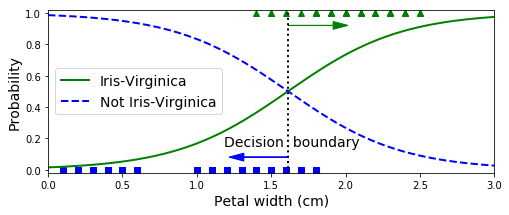

In [53]:
X_new = np.linspace(0, 3, 1000).reshape(-1, 1)
y_proba = log_reg.predict_proba(X_new)
decision_boundary = X_new[y_proba[:, 1] >= 0.5][0]

plt.figure(figsize=(8, 3))
plt.plot(X[y==0], y[y==0], "bs")
plt.plot(X[y==1], y[y==1], "g^")
plt.plot([decision_boundary, decision_boundary], [-1, 2], "k:", linewidth=2)
plt.plot(X_new, y_proba[:, 1], "g-", linewidth=2, label="Iris-Virginica")
plt.plot(X_new, y_proba[:, 0], "b--", linewidth=2, label="Not Iris-Virginica")
plt.text(decision_boundary+0.02, 0.15, "Decision  boundary", fontsize=14, color="k", ha="center")
plt.arrow(decision_boundary, 0.08, -0.3, 0, head_width=0.05, head_length=0.1, fc='b', ec='b')
plt.arrow(decision_boundary, 0.92, 0.3, 0, head_width=0.05, head_length=0.1, fc='g', ec='g')
plt.xlabel("Petal width (cm)", fontsize=14)
plt.ylabel("Probability", fontsize=14)
plt.legend(loc="center left", fontsize=14)
plt.axis([0, 3, -0.02, 1.02])
plt.show()

#### Softmax Regression
Logisitc regression can be made to support multiple classes without have to train and combine multiple binary classifiers

In [61]:
X = iris["data"][:, (2, 3)]  # petal length, petal width
y = iris["target"]

In [62]:
softmax_reg = LogisticRegression(multi_class="multinomial",solver="lbfgs", C=10, random_state=42)
softmax_reg.fit(X, y)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='multinomial',
          n_jobs=None, penalty='l2', random_state=42, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)

In [63]:

softmax_reg.predict([[5, 2]])

array([2])

In [64]:
softmax_reg.predict_proba([[5, 2]])

array([[6.38014896e-07, 5.74929995e-02, 9.42506362e-01]])

## Exercise
-----

1. One of the gradient decent algorithms would work, probably mini-batch would be best with a batch size of 50 to 100
2. Gradient decent would suffer, since the scale between the features would put more importance on the features with large numbers since the slope in the dimension is greater. solution is to scale the values with StandardScalar or to scale by min max.
3. No, the function is convex.
4. yes if the optimization problem is convex and the learning rate is not too high, then all of the algorithms will eventually reach the same or at the very least a similar answer.
5. there are multiple possibilities: one learning rate too high and algo is diverging. if training error also goes up then that is the problem, reducing learning rate will fix it. if traning error is the same, the its overfitting and introducing regularization might fix the problem.
6. No, you may stop too early, since it random so you might get a better result in the next epoch.
7. Stochastic is the fastes. Batch GD will converge and using decaying learning rate will make stochastic and mini-batch converge
8. Model is over fitting, there is high varience. Solutions: reduce degree of ploynomial, add regularization, add more data to train on
9. suffers from high bias, its underfitting. reduce regularization parameter
10. always used a regularized model, so ridge is the default. use lasso if you know only a few features are important. use elastic because lasso can preform erratically.
11. classes are not exclusive so we will need two logisitc regressors
12.
